In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [3]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     -------------------------------------  245.8/250.0 kB 7.4 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
excel_file="C:/Users/carlo/Desktop/AI_CWNU/documents/Seed_Data/Seed_Data.xlsx"
df = pd.read_excel(excel_file)
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         0.913358      0.007332      0.003147      0.834222      0.998724  
1         0.953861      0.006979      0.003564      0.909851      0.998430  
2         0.908774      0.007244      0.003048      0.825871      0.999066  
3         0.928329      0.007017      0.003215      0.861794      0.994199  
4         0.970516      0.006697      0.003665      0.941900      0.999166  
...            ...           ...           ...           ...           ...  
13606     0.801865      0.006858      0.001749      0.642988      0.998385  
13607     0.822252      0.006688      0.001886      0.676099      0.998219  
13608     0.822730      0.006681      0.001888      0.676884      0.996767  
13609     0.817457      0.006724      0.001852      0.668237      0.995222  
13610     0.784997      0.007001      0.001640      0.616221      0.998180  

[13611 rows x 16 columns]

데이터 셋 이름 : Seed_Dataset
features : 12 demensions  4shapeForm 
    
Missing value = No

Attribute Information:
1.) Area (A):부피
2.) Perimeter (P): 둘레 
3.) Major axis length (L): 가장 긴 길이
4.) Minor axis length (l): 가장 짧은 길이 
5.) Aspect ratio (K): L과 I 의 관계 (I/L)
6.) Eccentricity (Ec): 편심률 
7.) Convex area (C): 씨앗을 5각형으로 줄을그었을때 콩을 제외한 빈칸 
8.) Equivalent diameter (Ed): 동일한 지름
9.) Extent (Ex): 상자경계선 의 픽셀 비율 (Ex = A/AB)
10.)Solidity (S): 볼록 껍질의 픽셀 비율(단단함?)
11.)Roundness (R): 진원도 : 둥근 봉, 둥근 구멍, 둥근 추 또는 구 등이 진원에서 벗어난 정도 (4piA)/(P^2)
12.)Compactness (CO): 둥근정도를 측정  Ed/L
13.)ShapeFactor1 (SF1) 
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)


#비슷한 식물 클루스터링 (비슷한애들끼리 모아보기) 

Data View -> EDA 통계시각화
씨앗의 종류를 추측할 시각화만들어야함. -> 이걸로 clustering 해야함. (비슷한애들끼리 모으기) ->실루엣 계수-> 통계 , 시각화 

In [28]:
#shapeFactor 제거 
df = df.drop(columns=["ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"])

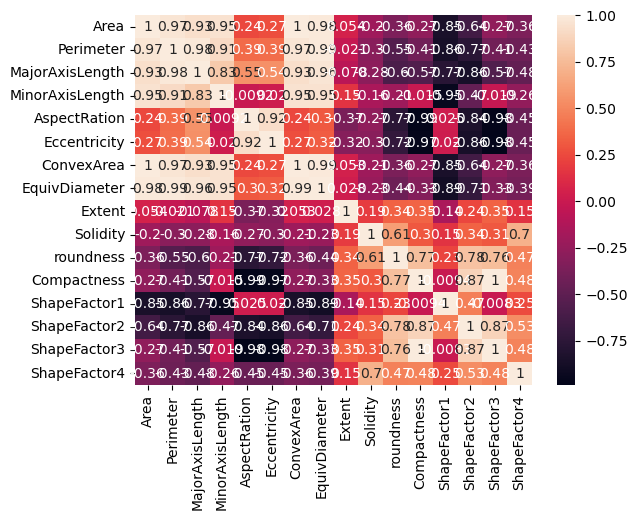

In [4]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.show()
 

<Figure size 640x480 with 0 Axes>

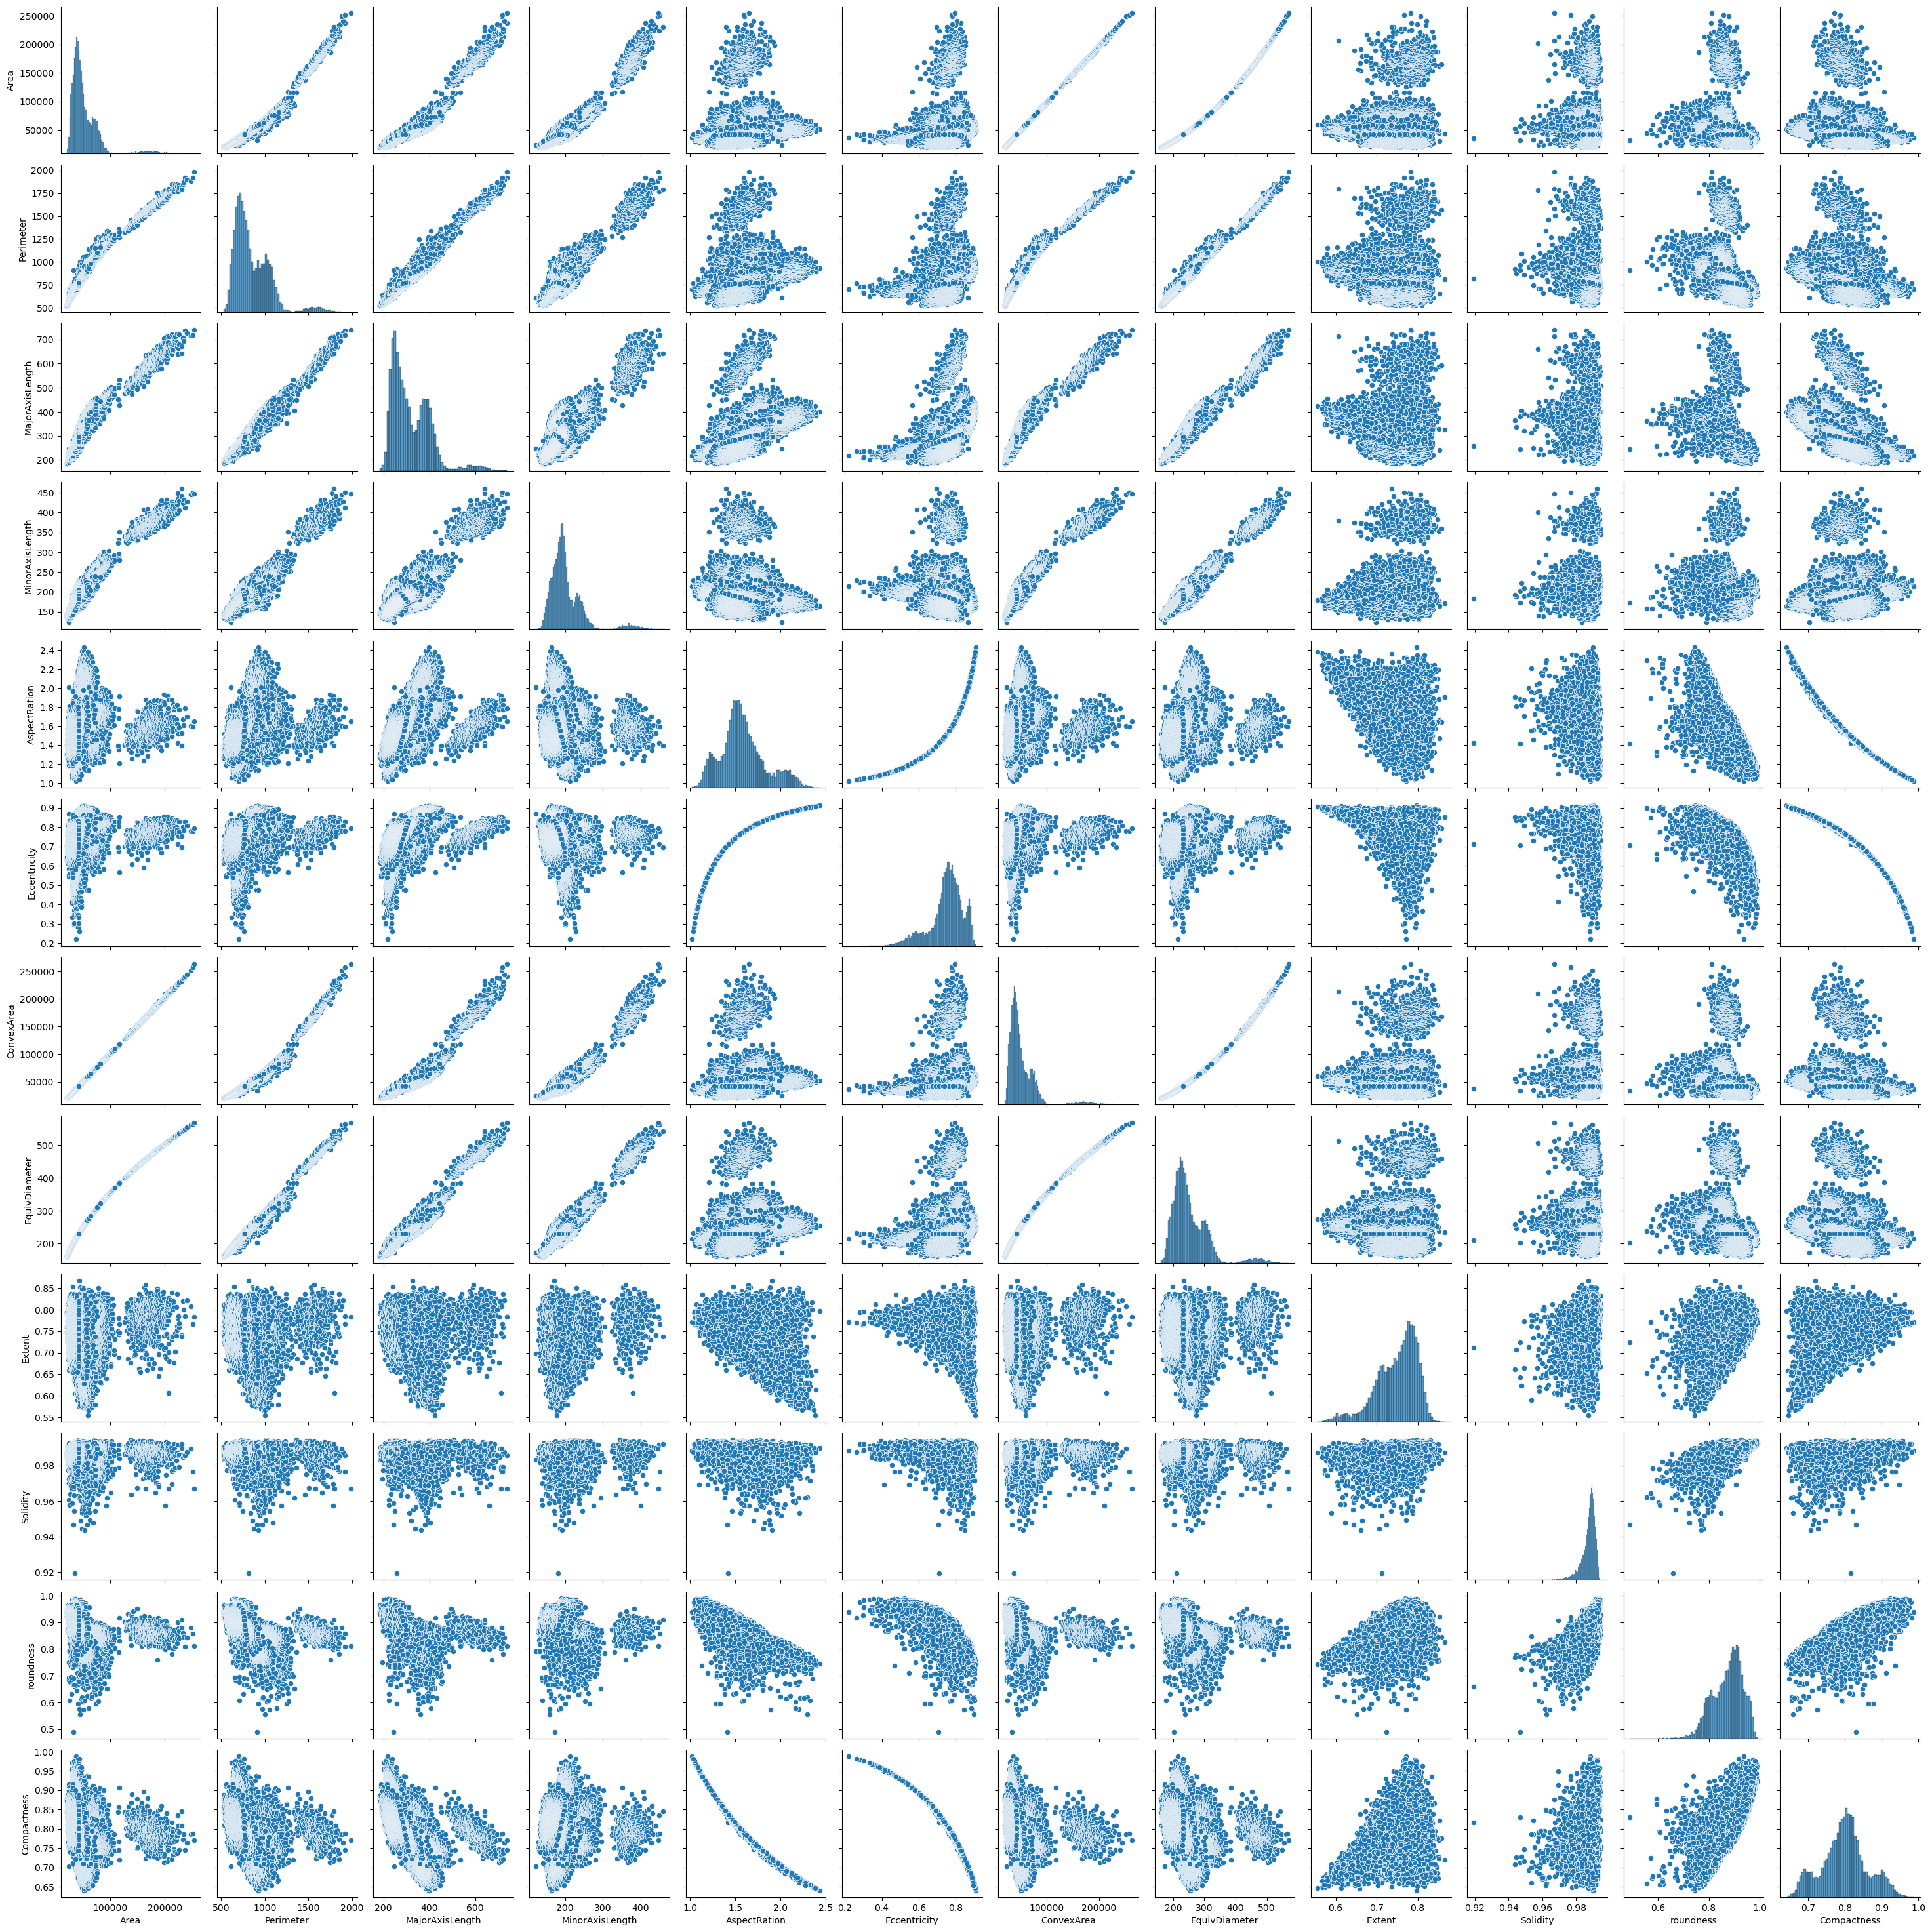

In [30]:
plt.figure()
sns.pairplot(df)
plt.show()
[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
            'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
            'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'

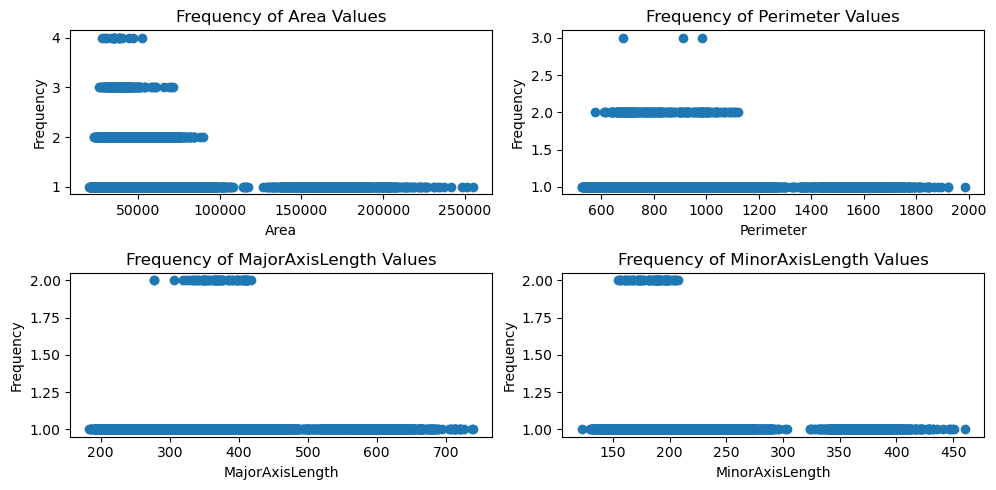

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
columns = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength"]

for ax, column in zip(axes.flatten(), columns):
    counts = df[column].value_counts()
    ax.scatter(counts.index, counts.values)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Frequency of {column} Values")
plt.tight_layout()
plt.show()

In [72]:
# 클러스터링 
X = df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
            'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
            'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']]
  
kmeans = KMeans(n_clusters=5 , init= 'random', random_state=0 ,max_iter = 300)
clusters = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
kmeans.cluster_centers_ 

array([[1.73708006e+05, 1.58682284e+03, 5.93746342e+02, 3.74494358e+02,
        1.58663498e+00, 7.71053829e-01, 1.76040635e+05, 4.69270023e+02,
        7.76670114e-01, 9.86888965e-01, 8.64297508e-01, 7.92303935e-01,
        3.44074409e-03, 8.42278481e-04, 6.28664768e-01, 9.91829684e-01],
       [4.47174930e+04, 7.98562524e+02, 2.99160985e+02, 1.92040797e+02,
        1.57315706e+00, 7.44319008e-01, 4.52551222e+04, 2.38381825e+02,
        7.46744371e-01, 9.88191542e-01, 8.83309726e-01, 8.03562241e-01,
        6.69310316e-03, 1.75463026e-03, 6.49943504e-01, 9.95732394e-01],
       [7.90791119e+04, 1.09695723e+03, 4.12344469e+02, 2.46089579e+02,
        1.68144384e+00, 7.97462749e-01, 8.03436588e+04, 3.16990330e+02,
        7.55228544e-01, 9.84264035e-01, 8.25820039e-01, 7.70354270e-01,
        5.23403732e-03, 1.14233679e-03, 5.94664695e-01, 9.92143382e-01],
       [6.10412143e+04, 9.72222574e+02, 3.74573945e+02, 2.09674132e+02,
        1.80778452e+00, 8.19108960e-01, 6.19892663e+04, 2.785

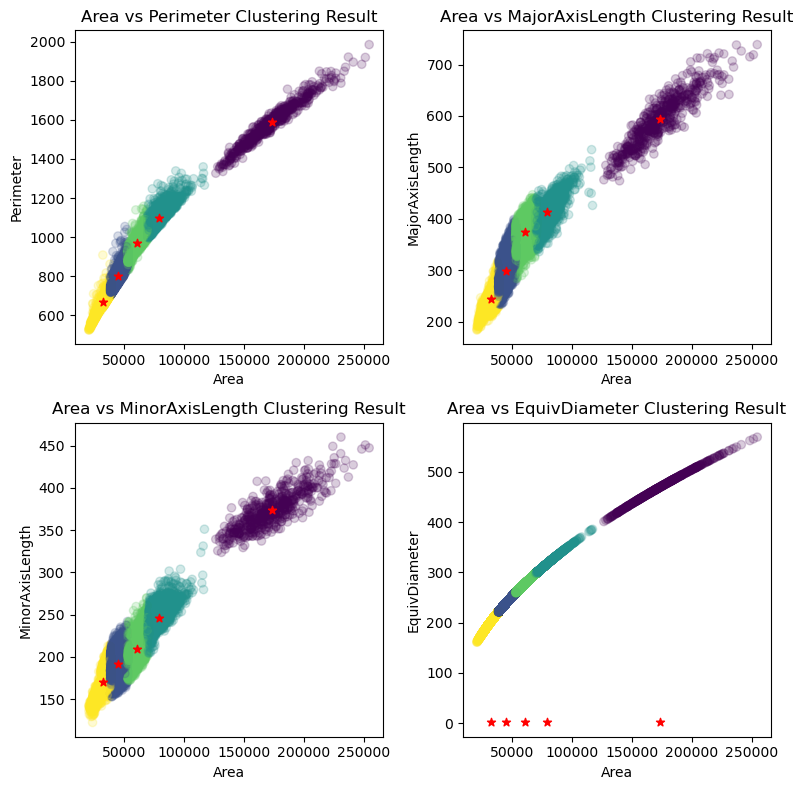

In [67]:
#Area 와 Perimeter", "MajorAxisLength", "MinorAxisLength", "EquivDiameter" 클루스터링 비교 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

xbox = "Area"
yboxs = ["Perimeter", "MajorAxisLength", "MinorAxisLength", "EquivDiameter"]
axes = [ax1, ax2, ax3, ax4]

for i, ybox in enumerate(yboxs):
    axes[i].scatter(df[xbox], df[ybox], c=clusters, alpha=0.2)
    axes[i].scatter(centers[:, 0], centers[:, i+1], c="r", marker="*")
    axes[i].set_xlabel(xbox)
    axes[i].set_ylabel(ybox)
    axes[i].set_title(f"{xbox} vs {ybox} Clustering Result")

plt.tight_layout()
plt.show()

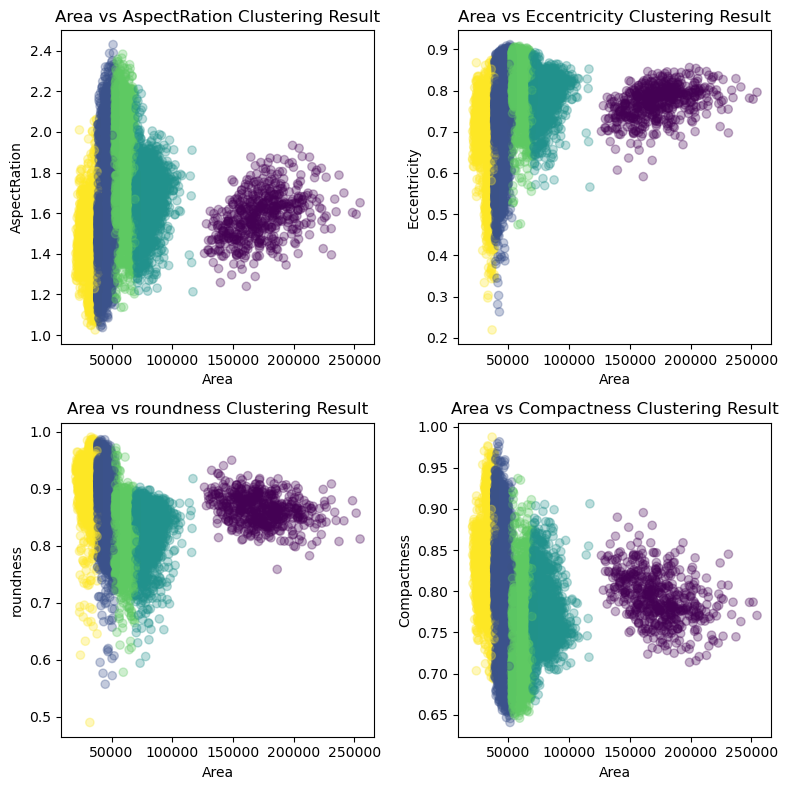

In [70]:
#Area 와  "AspectRation", "Eccentricity", "roundness" , "Compactness"클루스터링 비교 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

xbox = "Area"
yboxs = ["AspectRation", "Eccentricity", "roundness" , "Compactness"]
axes = [ax1, ax2, ax3, ax4]
for i, ybox in enumerate(yboxs):
    axes[i].scatter(df[xbox], df[ybox], c=clusters, alpha= 0.3)
    axes[i].set_xlabel(xbox)
    axes[i].set_ylabel(ybox)
    axes[i].set_title(f"{xbox} vs {ybox} Clustering Result")


plt.tight_layout()
plt.show()

In [77]:
# 실루엣 계수 계산
sil_avg = silhouette_score(X, clusters , metric= "euclidean")
print("Average silhouette score:", sil_avg)

# 실루엣 샘플 계산
sil_vals = silhouette_samples(X , clusters , metric= "euclidean")
print("Silhouette values", sil_vals)

Average silhouette score: 0.543164325167961
Silhouette values 13611


Average silhouette score: 0.543164325167961
Silhouette values [0.69378423 0.7008215  0.70985379 ... 0.60676899 0.61080967 0.60872296]


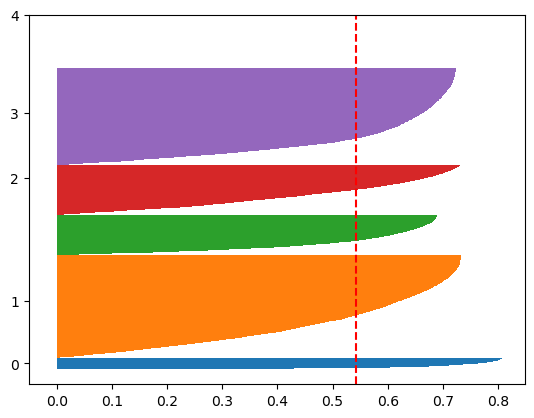

In [91]:
X = df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
        'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
        'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']]

kmeans = KMeans(n_clusters=5, init='random', random_state=0, max_iter=300)
clusters = kmeans.fit_predict(X)

sil_avg = silhouette_score(X, clusters, metric="euclidean")
print("Average silhouette score:", sil_avg)

sil_vals = silhouette_samples(X, clusters, metric="euclidean")
print("Silhouette values", sil_vals)

labels = np.unique(clusters)
plt.figure()
y_low = 0
y_high = 0
y_ticks = []
for i in labels:
    sil_vals_i = sil_vals[clusters == i]
    sil_vals_i.sort()
    y_high += len(sil_vals_i)
    plt.barh(range(y_low, y_high), sil_vals_i, height=1)
    y_ticks.append(y_low + y_high / 2)
    y_low = y_high
    
plt.axvline(sil_avg, color="r", linestyle="--")
plt.yticks(y_ticks, labels)
plt.show()


In [ ]:
======================================여기까지 내가 한 것  ========

In [ ]:
============교수님이 한것 


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [99]:
excel_file="C:/Users/carlo/Desktop/AI_CWNU/documents/Seed_Data/Seed_Data.xlsx"
df = pd.read_excel(excel_file)
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         0.913358      0.007332      0.003147      0.834222      0.998724  
1         0.953861      0.006979      0.003564      0.909851      0.998430  
2         0.908774      0.007244      0.003048      0.825871      0.999066  
3         0.928329      0.007017      0.003215      0.861794      0.994199  
4         0.970516      0.006697      0.003665      0.941900      0.999166  
...            ...           ...           ...           ...           ...  
13606     0.801865      0.006858      0.001749      0.642988      0.998385  
13607     0.822252      0.006688      0.001886      0.676099      0.998219  
13608     0.822730      0.006681      0.001888      0.676884      0.996767  
13609     0.817457      0.006724      0.001852      0.668237      0.995222  
13610     0.784997      0.007001      0.001640      0.616221      0.998180  

[13611 rows x 16 columns]

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


In [101]:
df.describe() 

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [ ]:
# EDA


In [ ]:
mean + 3  * std  ==> 이걸 넘어서면 이상치. 
mean - 3 * std  ==> 이것보다 작으면 이상치. 


3qr 이상치 판단기준 검색. !

In [ ]:
다중공선성 10이상 이면 큰것. 